In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

Importing CSV

In [3]:
import pandas as pd
# URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/GDG-IGDTUW/AI-ML-2/main/Dementia%20Prediction/dementia_dataset.csv"
data = pd.read_csv(url)
print(data.head())


  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


In [4]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Missing Values

In [6]:
null_values = data.isnull().sum()
print(null_values)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


Columns SES and MMSE have null values

SES: Socioeconomic status of the participant.


MMSE: Mini-Mental State Examination score (a measure of cognitive function).

Replacing null values with mean of the data in that column

In [7]:
data['SES'] = data['SES'].fillna(data['SES'].mean())
data['MMSE'] = data['MMSE'].fillna(data['MMSE'].mean())

In [8]:
null_values = data.isnull().sum()
print(null_values)

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


Normalise the numerical values:

In [9]:
print(data.head())

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

        SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.000000  27.0  0.0  1987  0.696  0.883  
1  2.000000  30.0  0.0  2004  0.681  0.876  
2  2.460452  23.0  0.5  1678  0.736  1.046  
3  2.460452  28.0  0.5  1738  0.713  1.010  
4  2.460452  22.0  0.5  1698  0.701  1.034  


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.70      0.59      0.64        32
           2       0.54      0.78      0.64        32

    accuracy                           0.59        75
   macro avg       0.42      0.46      0.43        75
weighted avg       0.53      0.59      0.55        75



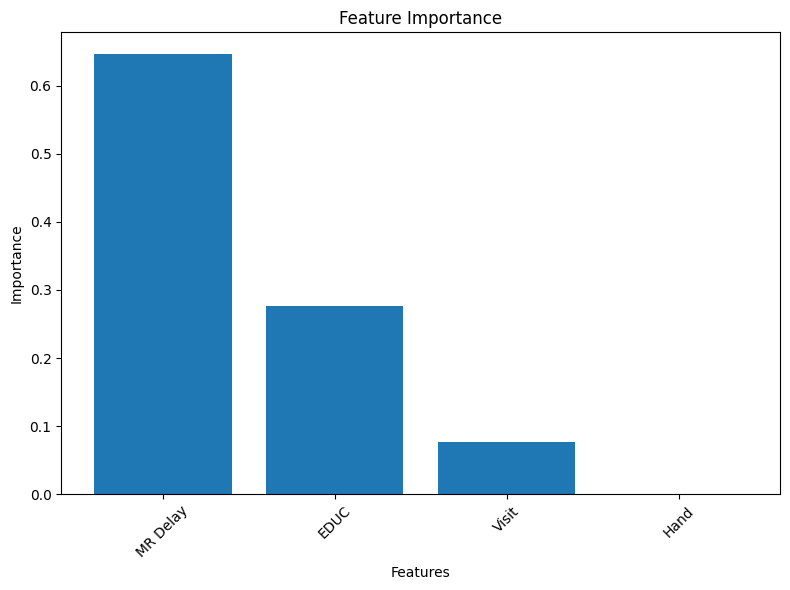

In [10]:
#remove unnecessary columns(if any)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select the features
features = ['EDUC', 'Visit', 'MR Delay', 'Hand']
target = 'Group'

# Encode categorical target variable
data[target] = LabelEncoder().fit_transform(data[target])  # Encode 'Group' (e.g., Demented/Nondemented)

# Handle categorical variable 'Hand'
data['Hand'] = LabelEncoder().fit_transform(data['Hand'])  # Encode 'Hand' (e.g., R/L)

# Select features and target
X = data[features]
y = data[target]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


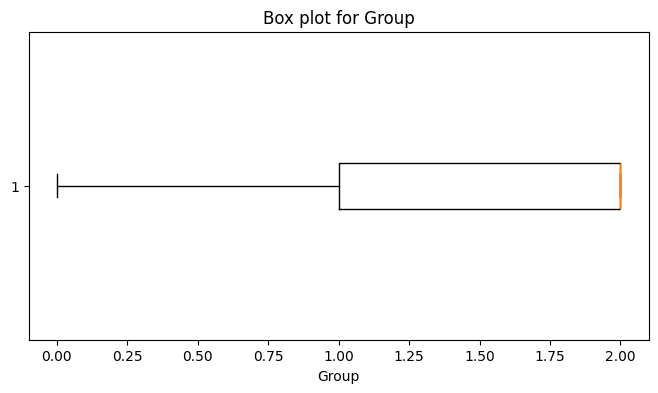

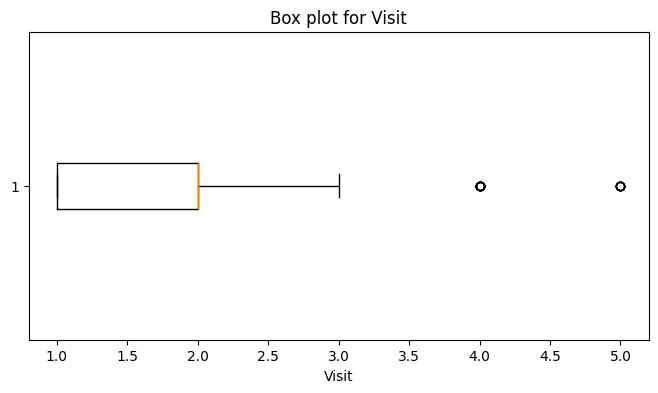

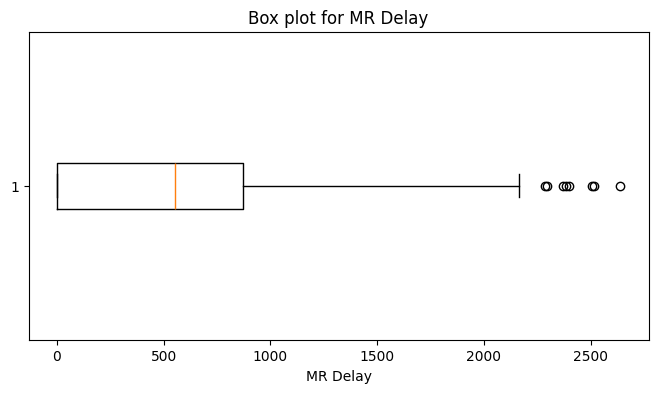

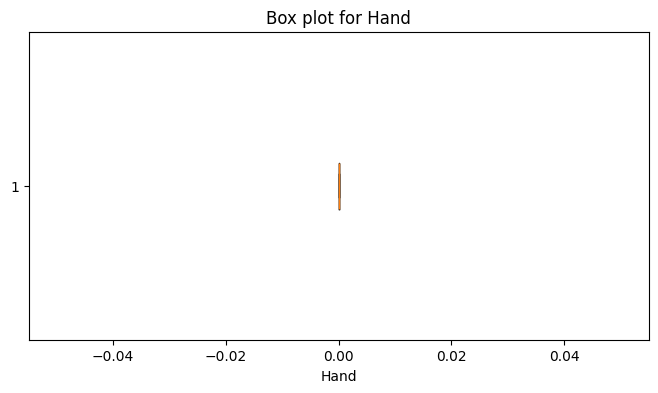

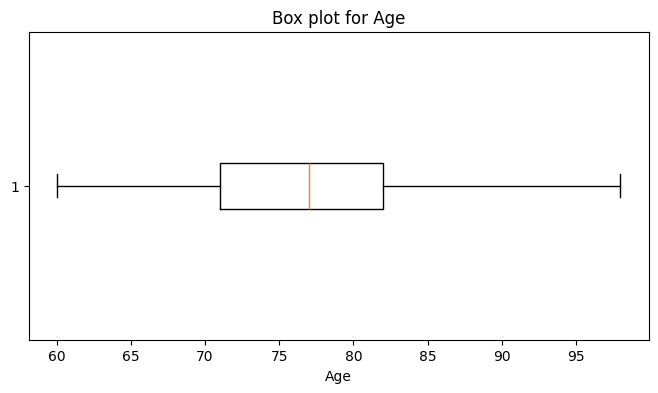

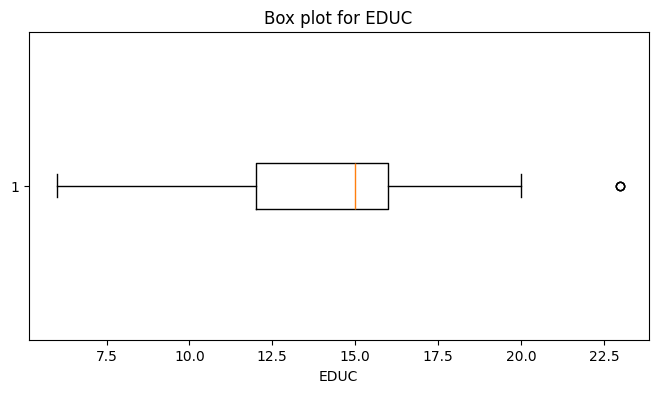

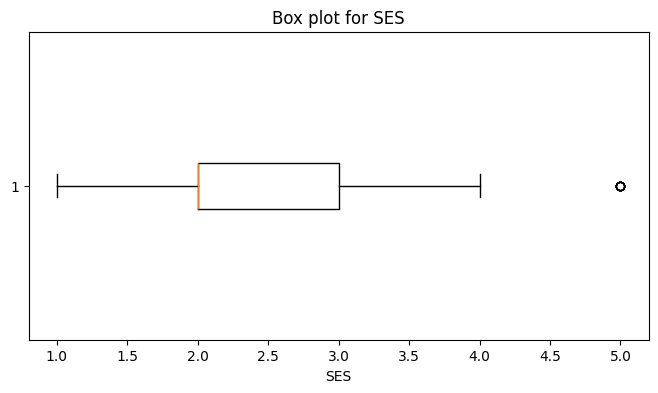

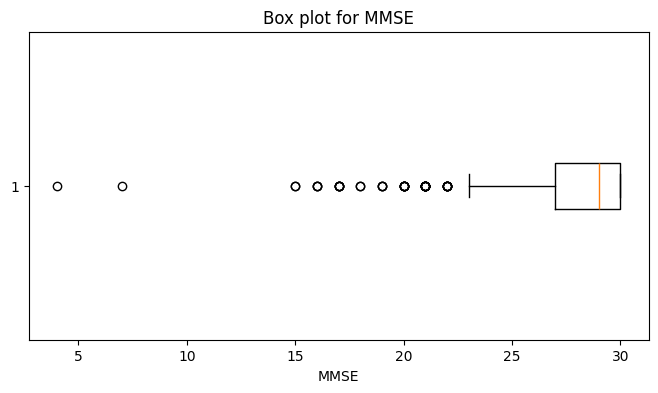

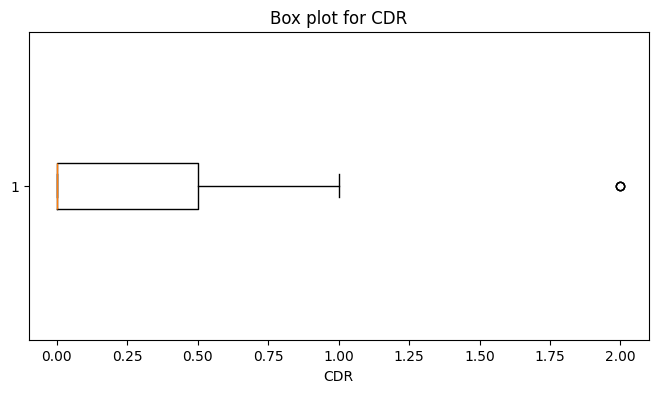

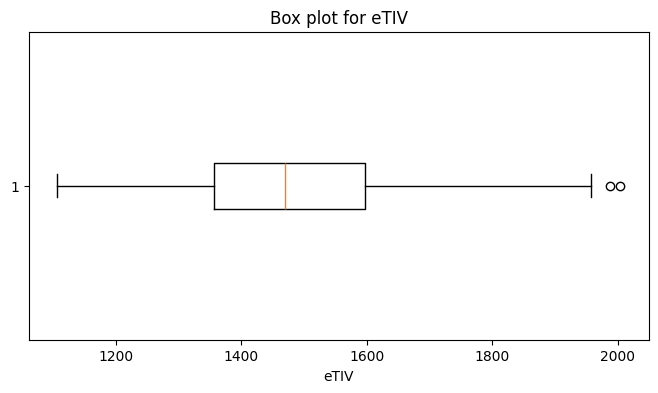

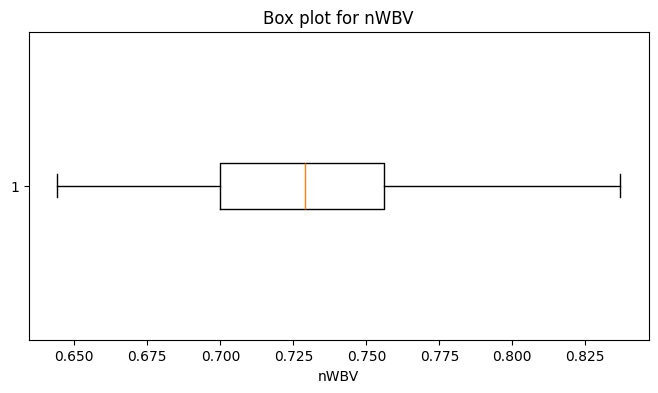

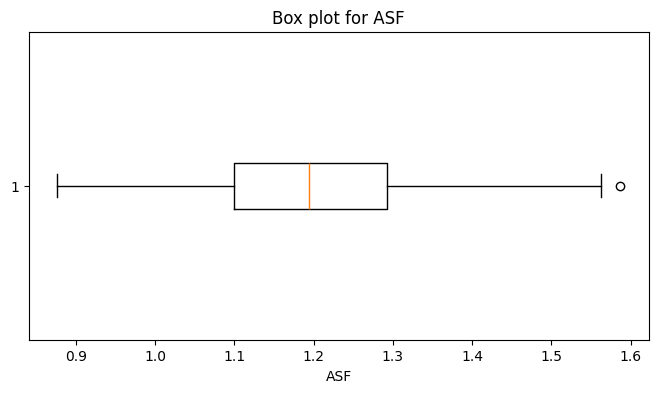

In [11]:
# check for outliers using box plot
def check_outliers_with_boxplot(df, numeric_columns=None):
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(df[col].dropna(), vert=False)
        plt.title(f"Box plot for {col}")
        plt.xlabel(col)
        plt.show()

check_outliers_with_boxplot(data)

In [12]:
# convert the categorical values into numerical values
def convert_categorical_to_numerical(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    label_encoders = {}

    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le  # Store the encoder for future use or inverse transformations

    print(f"Label-encoded columns: {list(categorical_columns)}")
    return df, label_encoders

data, encoders = convert_categorical_to_numerical(data)
print(data)

Label-encoded columns: ['Subject ID', 'MRI ID', 'M/F']
     Subject ID  MRI ID  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0             0       0      2      1         0    1     0   87    14   
1             0       1      2      2       457    1     0   88    14   
2             1       2      1      1         0    1     0   75    12   
3             1       3      1      2       560    1     0   76    12   
4             1       4      1      3      1895    1     0   80    12   
..          ...     ...    ...    ...       ...  ...   ...  ...   ...   
368         148     368      1      2       842    1     0   82    16   
369         148     369      1      3      2297    1     0   86    16   
370         149     370      2      1         0    0     0   61    13   
371         149     371      2      2       763    0     0   63    13   
372         149     372      2      3      1608    0     0   65    13   

          SES  MMSE  CDR  eTIV   nWBV    ASF  
0    2.000000  27.0  

In [13]:
# Standardise the numerical values
from sklearn.preprocessing import MinMaxScaler
columns = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
s = MinMaxScaler()
data[columns] = s.fit_transform(data[columns])

In [15]:
# split the data in training and testing dataset
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression model

In [16]:
#Logistic Regression Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [17]:
# use svm to train the model on training dataset

In [18]:
# evaluate the SVM model

In [19]:
# use random forest

In [20]:
# evaluate this model

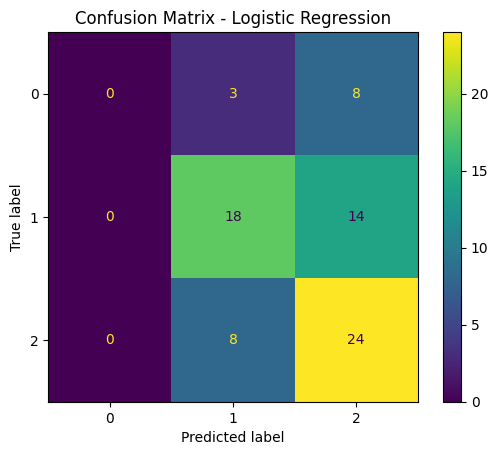

In [21]:
# plot confusion matrix for all 3 models
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression

ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
